## Tutorial to generate predictions while setting interaction parameters.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle
import seaborn as sb
from predict_by_model import *
from GenerateLambdas import *

First, this tutorial will break down how the interaction parameters are generated in the main function of the module.

we will predict c. diff engraftment on mice for which we have 16s community data. Community data is given as a .csv file called *Cdif_mice_high_vs_low_risk.species.tsv* whose columns correspond to mice and rows correspond to taxa, and entries corresponding to read counts.

To do this, we will use the predictions of pairwise metabolic modeling with resource allocation constraints as "observed" pairwise experiments. These "observations" can be found in *Pairwise_Chemostat.xlsx*.

For this data, we require a function to parse the taxa labels into something that matches our pairwise equilibrium data.

In [2]:
def GetStrn(strg):
    s1 = strg.split(";")[-1]
    s2 = "_".join(s1.split("__")[1:])
    return s2

We're going to load and parse some communities (this tutorial will only use one of them.

In [3]:
miceData = pd.read_csv("Cdiff_mice_high_vs_low_risk.species.tsv",sep = '\t')
Experiments = miceData.columns[np.where(['WK' in colnm for colnm in miceData.columns])]
species = miceData.species.apply(GetStrn)

To generate interaction parameters from the bottom up, we must provide a set of "observed" equilibrium relative abundances from pairwise growth experiments. This file should have rows \& columns corresponding to taxa, and include all taxa present in the communities, if possible. The module will attempt to match the taxa names from the community data file (miceData) to these labels, and will return the number found and the proportion of reads covered by those found.

In [4]:
ObservationFile =  "Pairwise_Chemostat.xlsx" #This should be an excel file with a sheet labeled "Relative_Abundance"

We have a set of experiments, we'll only use one for this notebook:

In [5]:
Experiments

Index(['H1_4WK', 'H2_4WK', 'H3_4WK', 'H4_4WK', 'H5_4WK', 'H6_4WK', 'L1_4WK',
       'L2_4WK', 'L3_4WK', 'L4_4WK', 'L5_4WK', 'L6_4WK'],
      dtype='object')

In [6]:
Exp = "H1_4WK"

We first trim the community by read percentage. This will give us our initial species list read proportions.

In [7]:
by_proportion = miceData[Exp]/sum(miceData[Exp])
spec_list = list(species[by_proportion>0.001])
by_proportion.index = species
experiment = Experiment()
experiment.Community = spec_list
experiment.Invader = None

Next, we generate the interaction parameters using the pairwise equilibrium:

In [10]:
LambdaMat,foundList = GenerateLambdasFromExcel(experiment,version = "Equilibrium",File = ObservationFile)

Bacteroides_salanitronis not found
Barnesiella_viscericola not found
Prevotella_buccalis not found
Prevotella_sp._109 not found
Alistipes_obesi not found
Clostridia_bacterium_UC5.1-1D1 not found
[Ruminococcus]_torques not found
[Clostridium]_celerecrescens not found
Erysipelatoclostridium_ramosum not found


Now, we have a matrix of interactions:

In [11]:
LambdaMat

,'Bacteroides_cellulosilyticus_DSM_14838.mat','Bacteroides_coprocola_M16_DSM_17136.mat','Bacteroides_coprophilus_DSM_18228.mat','Bacteroides_fluxus_YIT_12057.mat','Bacteroides_oleiciplenus_YIT_12058.mat','Bacteroides_ovatus_ATCC_8483.mat','Bacteroides_plebeius_M12_DSM_17135.mat','Bacteroides_salyersiae_WAL_10018.mat','Bacteroides_stercoris_ATCC_43183.mat','Bacteroides_thetaiotaomicron_VPI_5482.mat','Bacteroides_uniformis_ATCC_8492.mat','Bacteroides_vulgatus_ATCC_8482.mat','Bifidobacterium_animalis_lactis_AD011.mat','Enterococcus_faecalis_OG1RF_ATCC_47077.mat','Flavonifractor_plautii_ATCC_29863.mat','Lactobacillus_plantarum_JDM1.mat','Odoribacter_laneus_YIT_12061.mat','Parabacteroides_distasonis_ATCC_8503.mat','Parabacteroides_johnsonii_DSM_18315.mat'
'Bacteroides_cellulosilyticus_DSM_14838.mat',0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_coprocola_M16_DSM_17136.mat',0.009544,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_coprophilus_DSM_18228.mat',1.439688,9.028366,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_fluxus_YIT_12057.mat',1.638258,8.517325,1.354821,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_oleiciplenus_YIT_12058.mat',0.987206,16.678041,0.554811,0.550451,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_ovatus_ATCC_8483.mat',9.287867,27.966049,1.442998,0.674321,1.528874,0,1,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_plebeius_M12_DSM_17135.mat',-1,0.619465,0.280367,0.241649,0.422586,-1,0,1,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_salyersiae_WAL_10018.mat',1.802215,12.095913,3.386024,1.168902,4.791902,1.31128,5.469454,0,1,1,1,1,1,1,1,1,1,1,1
'Bacteroides_stercoris_ATCC_43183.mat',0.30959,2.485652,0.784688,0.680364,1.067169,0.152628,2.007673,0.507574,0,1,1,1,1,1,1,1,1,1,1
'Bacteroides_thetaiotaomicron_VPI_5482.mat',4.35886,5.43464,0.79176,0.637127,1.571607,0.165565,32.74744,0.615897,6.454655,0,1,1,1,1,1,1,1,1,1


We can explore any community by making a similar pandas dataframe, with column/row labels corresponding to the names of the community members.

We next simulate the community to equilibrium (or a time cut off)

In [12]:
CommunityEquilibrium,fullSim = predict_justComm(LambdaMat,verb = False)

[Text(0, 0, "'Bacteroides_cellulosilyticus_DSM_14838.mat'"),
 Text(1, 0, "'Bacteroides_coprocola_M16_DSM_17136.mat'"),
 Text(2, 0, "'Bacteroides_coprophilus_DSM_18228.mat'"),
 Text(3, 0, "'Bacteroides_fluxus_YIT_12057.mat'"),
 Text(4, 0, "'Bacteroides_oleiciplenus_YIT_12058.mat'"),
 Text(5, 0, "'Bacteroides_ovatus_ATCC_8483.mat'"),
 Text(6, 0, "'Bacteroides_plebeius_M12_DSM_17135.mat'"),
 Text(7, 0, "'Bacteroides_salyersiae_WAL_10018.mat'"),
 Text(8, 0, "'Bacteroides_stercoris_ATCC_43183.mat'"),
 Text(9, 0, "'Bacteroides_thetaiotaomicron_VPI_5482.mat'"),
 Text(10, 0, "'Bacteroides_uniformis_ATCC_8492.mat'"),
 Text(11, 0, "'Bacteroides_vulgatus_ATCC_8482.mat'"),
 Text(12, 0, "'Bifidobacterium_animalis_lactis_AD011.mat'"),
 Text(13, 0, "'Enterococcus_faecalis_OG1RF_ATCC_47077.mat'"),
 Text(14, 0, "'Flavonifractor_plautii_ATCC_29863.mat'"),
 Text(15, 0, "'Lactobacillus_plantarum_JDM1.mat'"),
 Text(16, 0, "'Odoribacter_laneus_YIT_12061.mat'"),
 Text(17, 0, "'Parabacteroides_distasonis_ATCC

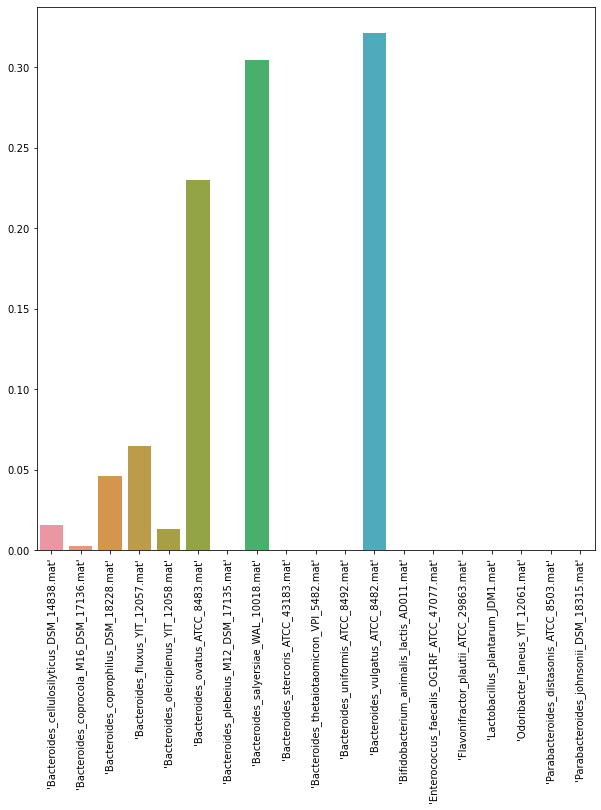

In [14]:
fig,ax = plt.subplots(figsize = (10,10))

keys = list(CommunityEquilibrium.keys())
# get values in the same order as keys, and parse percentage values
vals = [float(CommunityEquilibrium[k]) for k in keys]
sb.barplot(x=keys, y=vals, ax = ax)
ax.set_xticklabels(keys, rotation = 90)